In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A = 3.0

In [2]:
def s(x, t):
    m = A*math.exp(-0.5*t)
    ap = 0.5*((x - m) ** 2)
    an = 0.5*((-x - m) ** 2)
    wp = np.exp(-ap)
    wn = np.exp(-an)
    w = (wp - wn) / (wp + wn)
    res = -x + m*w
    return res

In [3]:
def solve_sde_fwd(z, n_timesteps, T=20.0):
    h = T / n_timesteps
    xt = np.copy(z)
    for i in range(n_timesteps):
        t = i*h
        dxt = -0.5*xt*h + np.random.normal(size=z.shape) * math.sqrt(h)
        xt += dxt
    return xt

def solve_sde_bwd(z, n_timesteps, T=20.0):
    h = T / n_timesteps
    xt = np.copy(z)
    for i in range(n_timesteps):
        t = T - i*h
        dxt = -0.5*xt*h - s(xt, t)*h + np.random.normal(size=z.shape) * math.sqrt(h)
        xt -= dxt
    return xt

def solve_ode_fwd(z, n_timesteps, T=20.0):
    h = T / n_timesteps
    xt = np.copy(z)
    for i in range(n_timesteps):
        t = i*h
        dxt = -0.5*(xt + s(xt, t))*h
        xt += dxt
    return xt

def solve_ode_bwd(z, n_timesteps, T=20.0):
    h = T / n_timesteps
    xt = np.copy(z)
    for i in range(n_timesteps):
        t = T - i*h
        dxt = -0.5*(xt + s(xt, t))*h
        xt -= dxt
    return xt

In [4]:
n_timesteps = 50000
n = 20000

points_sde = []
points_ode = []
reconstruction_sde = []
reconstruction_ode = []

classes = 2*(np.random.uniform(size=4*n) < 0.5).astype(np.float32) - 1
data = np.random.normal(size=4*n) + A*classes
data = np.sort(data)

for i in range(4):
    points_sde.append(solve_sde_fwd(data[i*n:(i+1)*n], n_timesteps=n_timesteps))
    reconstruction_sde.append(solve_sde_bwd(points_sde[-1], n_timesteps=n_timesteps))
    points_ode.append(solve_ode_fwd(data[i*n:(i+1)*n], n_timesteps=n_timesteps))
    reconstruction_ode.append(solve_ode_bwd(points_ode[-1], n_timesteps=n_timesteps))

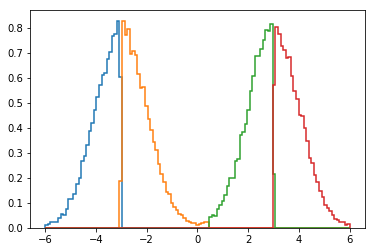

In [5]:
plt.figure()
for i in range(4):
    plt.hist(data[i*n:(i+1)*n], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.show()

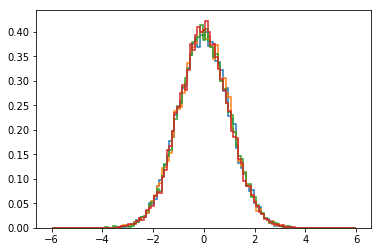

In [6]:
plt.figure()
plt.hist(points_sde[0], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(points_sde[1], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(points_sde[2], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(points_sde[3], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.show()

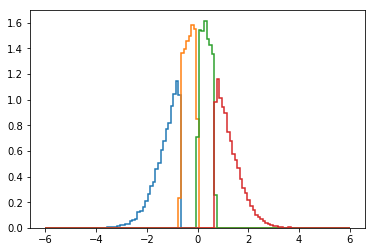

In [7]:
plt.figure()
plt.hist(points_ode[0], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(points_ode[1], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(points_ode[2], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(points_ode[3], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.show()

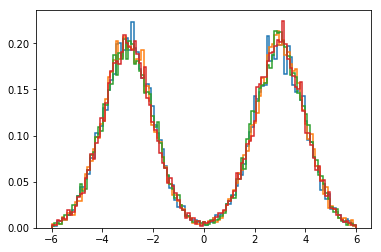

In [8]:
plt.figure()
plt.hist(reconstruction_sde[0], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(reconstruction_sde[1], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(reconstruction_sde[2], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(reconstruction_sde[3], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.show()

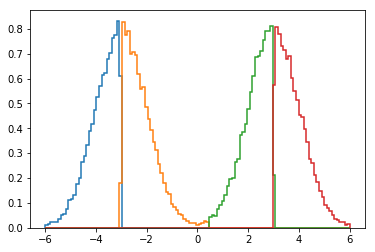

In [9]:
plt.figure()
plt.hist(reconstruction_ode[0], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(reconstruction_ode[1], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(reconstruction_ode[2], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.hist(reconstruction_ode[3], bins=np.linspace(-6, 6, 120), normed=True, histtype='step', linewidth=1.5)
plt.show()

In [11]:
reconstructions_ode = np.concatenate(reconstruction_ode)
reconstructions_sde = np.concatenate(reconstruction_sde)
print('SDE cost: %.10f' % np.mean((reconstructions_sde - data) ** 2))
print('ODE cost: %.10f' % np.mean((reconstructions_ode - data) ** 2))

SDE cost: 19.9266823254
ODE cost: 0.0000005227


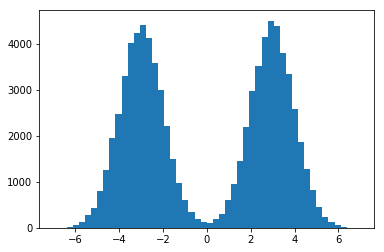

In [14]:
plt.figure()
plt.hist(reconstructions_sde, bins=50)
plt.show()

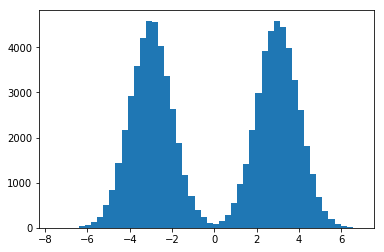

In [15]:
plt.figure()
plt.hist(reconstructions_ode, bins=50)
plt.show()

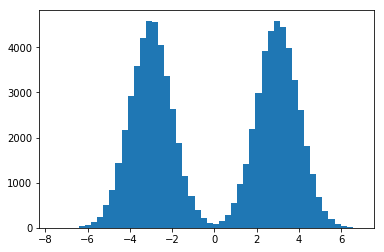

In [16]:
plt.figure()
plt.hist(data, bins=50)
plt.show()